# Aprendizado de Máquina

In [1]:
# Importações das bibliotecas
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import sklearn
import matplotlib
import keras
from sklearn.feature_extraction.text import CountVectorizer
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import torch
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tqdm import tqdm
import tensorflow as tf

In [2]:
# Set the environment variable to enable GPU usage
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'), 'GPU')

## 1. Tratamento de dados básicos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/b2w.csv', on_bad_lines='skip')

In [5]:
# Remove valores NaN
data.dropna(inplace = True)

In [6]:
data[['review_text','rating']]

,review_text,rating
0,Bem macio e felpudo...recomendo. Preço imbatí...,4
1,Produto excepcional! recomendo!!! inovador e ...,5
2,recebi o produto antes do prazo mas veio com d...,1
3,Bom custo beneficio. Adequado para pessoas que...,5
5,"ótmo produto atendeu as expectativas, a entreg...",4
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",5
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,5
132369,Eu estou muito chateado com isso gostaria que ...,1
132371,O produto anunciado no site dizia ser 100% al...,1


In [7]:
nltk.download('stopwords')
stop = stopwords.words('portuguese')

# lowercase
data['review_text'] = data['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove stopwords
data['review_text'] = data['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Remove pontuação e adciona espaço
data['review_text'] = data['review_text'].str.replace('[^\w\s]',' ')

# Remove números
data['review_text'] = data['review_text'].str.replace('\d+', '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-7-e2494f7eb63a>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_text'] = data['review_text'].str.replace('[^\w\s]',' ')
<ipython-input-7-e2494f7eb63a>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_text'] = data['review_text'].str.replace('\d+', '')


In [8]:
data[['review_text','rating']]

,review_text,rating
0,bem macio felpudo recomendo preço imbatível...,4
1,produto excepcional recomendo inovador gos...,5
2,recebi produto antes prazo veio defeito trava ...,1
3,bom custo beneficio adequado pessoas fazem us...,5
5,ótmo produto atendeu expectativas entrega oco...,4
...,...,...
132367,ótimo jogo melhores joguei entrega produto l...,5
132368,smarthphone perfeito bom economia energia perf...,5
132369,chateado gostaria vcs resolve se rápido pq pag...,1
132371,produto anunciado site dizia algodão porém ...,1


In [9]:
# Para avaliações maiores ou igual a 4 irá receber classificação positiva, caso contrário negativa
data['rating'] = np.where(data['rating'] >= 4, 'pos', 'neg')

In [10]:
data['rating']

0         pos
1         pos
2         neg
3         pos
5         pos
         ... 
132367    pos
132368    pos
132369    neg
132371    neg
132372    neg
Name: rating, Length: 116058, dtype: object

In [11]:
#Classificador binário irá receber 0 para negativo e 1 para positivo
data['label'] = np.where(data['rating'] == 'pos', 1, 0)

In [12]:
print(data[['label', 'rating']])

        label rating
0           1    pos
1           1    pos
2           0    neg
3           1    pos
5           1    pos
...       ...    ...
132367      1    pos
132368      1    pos
132369      0    neg
132371      0    neg
132372      0    neg

[116058 rows x 2 columns]


In [13]:
# Quantidade de valores positivos e negativos
data['label'].value_counts() 

1    80300
0    35758
Name: label, dtype: int64

In [14]:
data['review_text']

0         bem macio felpudo   recomendo  preço imbatível...
1         produto excepcional  recomendo    inovador gos...
2         recebi produto antes prazo veio defeito trava ...
3         bom custo beneficio  adequado pessoas fazem us...
5         ótmo produto atendeu expectativas  entrega oco...
                                ...                        
132367    ótimo jogo  melhores joguei  entrega produto l...
132368    smarthphone perfeito bom economia energia perf...
132369    chateado gostaria vcs resolve se rápido pq pag...
132371    produto anunciado site dizia   algodão  porém ...
132372    recebi produto consta entregue site  ja reclam...
Name: review_text, Length: 116058, dtype: object

In [27]:
# Mudando dataframe do pandas para array numpy
X = data['review_text'].values
y = data['label'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Usamos fit() nos dados do treino para aprendermos os parâmetros de escala a partir dos dados do treino. Depois usamos transform() nos dados para aplicar os parâmetros de dimensionamento aprendidos ao fitar os dados de treino.

In [29]:
#vectorizer converte o texto em valor numérico ( ID único para cada palavra)
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X_train) # fitando apenas os dados de treino para não haver roubo

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

## 2. Implementação dos modelos

#Rede Neural

In [30]:
#Divide os dados em treino e validação 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

No Keras, especificamos se queremos ou não que uma determinada camada inclua bias para todos os seus neurônios com o parâmetro use_bias. Se quisermos incluir bias, definimos o valor do parâmetro como True. Caso contrário, definimos como False.

In [31]:
model = Sequential()
model.add(layers.Dense(60, input_dim=X_train.shape[1], activation='relu', use_bias = True, bias_initializer='ones')) #camda de entrada
model.add(layers.Dense(1, activation='sigmoid'))# camada de saída

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 60)                2540100   
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 2,540,161
Trainable params: 2,540,161
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Treinando a Rede Neural
%time history = model.fit(X_train, y_train,epochs=60,verbose=False,validation_data=(X_val, y_val),batch_size=X_train.shape[0])

CPU times: user 32.5 s, sys: 869 ms, total: 33.4 s
Wall time: 35.8 s


In [33]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Ein: %0.4f' % (1 - accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Eout: %0.4f' % (1 - accuracy))

Ein: 0.0631
Eout: 0.0893


In [34]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Acurácia de treino: %0.4f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Acurácia de teste: %0.4f' % (accuracy))

Acurácia de treino: 0.9369
Acurácia de teste: 0.9107


In [35]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

726/726 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7128
           1       0.92      0.95      0.94     16084

    accuracy                           0.91     23212
   macro avg       0.90      0.89      0.89     23212
weighted avg       0.91      0.91      0.91     23212



In [36]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Treino acc')
    plt.plot(x, val_acc, 'r', label='Validação acc')
    plt.title('Acurácia de treinamento e validação')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Treino loss')
    plt.plot(x, val_loss, 'r', label='Validação loss')
    plt.title('Erro de treinamento e validação')
    plt.legend()

Para facilitar sua vida, você pode usar esta pequena função auxiliar para visualizar a perda e a precisão dos dados de treinamento e teste com base no callback do histórico. Este callback, que é aplicado automaticamente a cada modelo Keras, registra a perda e métricas adicionais que podem ser adicionadas no método .fit(). Neste caso, estamos interessados ​​apenas na precisão.

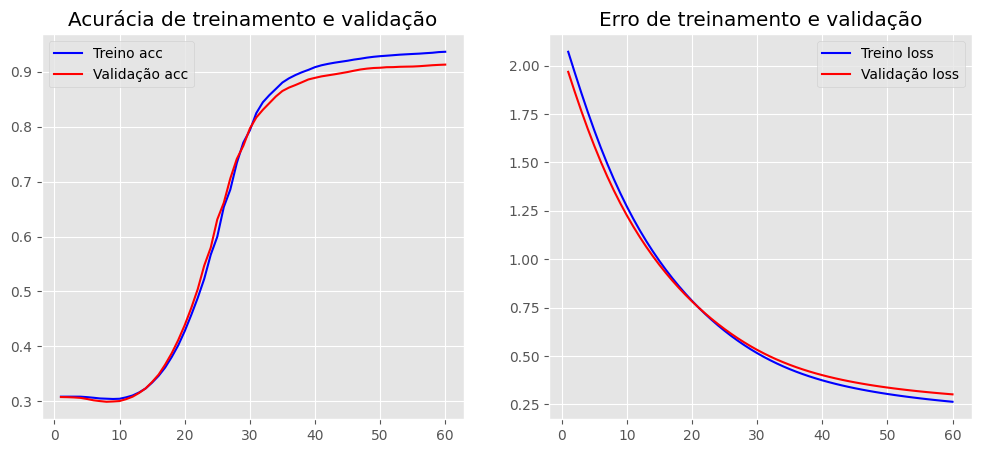

In [37]:
 plot_history(history)

Uma boa maneira de saber quando parar o modelo para evitar overfitting é observar quando a acurácia de treino e teste começa a se distanciar.

In [39]:
sentence = ["não recebi o produto"]
sentence = vectorizer.transform(sentence)
if model.predict(sentence) > 0.5 :
  print("Análise positiva")
else:
  print("Análise negativa")
model.predict(sentence)

1/1 [==============================] - 0s 45ms/step
Análise negativa
1/1 [==============================] - 0s 40ms/step


array([[0.3480589]], dtype=float32)

In [26]:
#Resetando o modelo caso for preciso ajustar parâmetros 
model.reset_states()
history = model.reset_states()

#Árvore de Decisão

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [32]:
#Limitando a profundidade da árvore em 10, visto a enorme quantidade de dados
clf = DecisionTreeClassifier(max_depth = 10, random_state=0)
%time clf.fit(X_train, y_train)

CPU times: user 1.58 s, sys: 5.9 ms, total: 1.59 s
Wall time: 2.85 s


DecisionTreeClassifier(max_depth=10, random_state=0)

In [33]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.1923
Eout: 0.1983
              precision    recall  f1-score   support

           0       0.86      0.43      0.57      7162
           1       0.79      0.97      0.87     16050

    accuracy                           0.80     23212
   macro avg       0.83      0.70      0.72     23212
weighted avg       0.81      0.80      0.78     23212



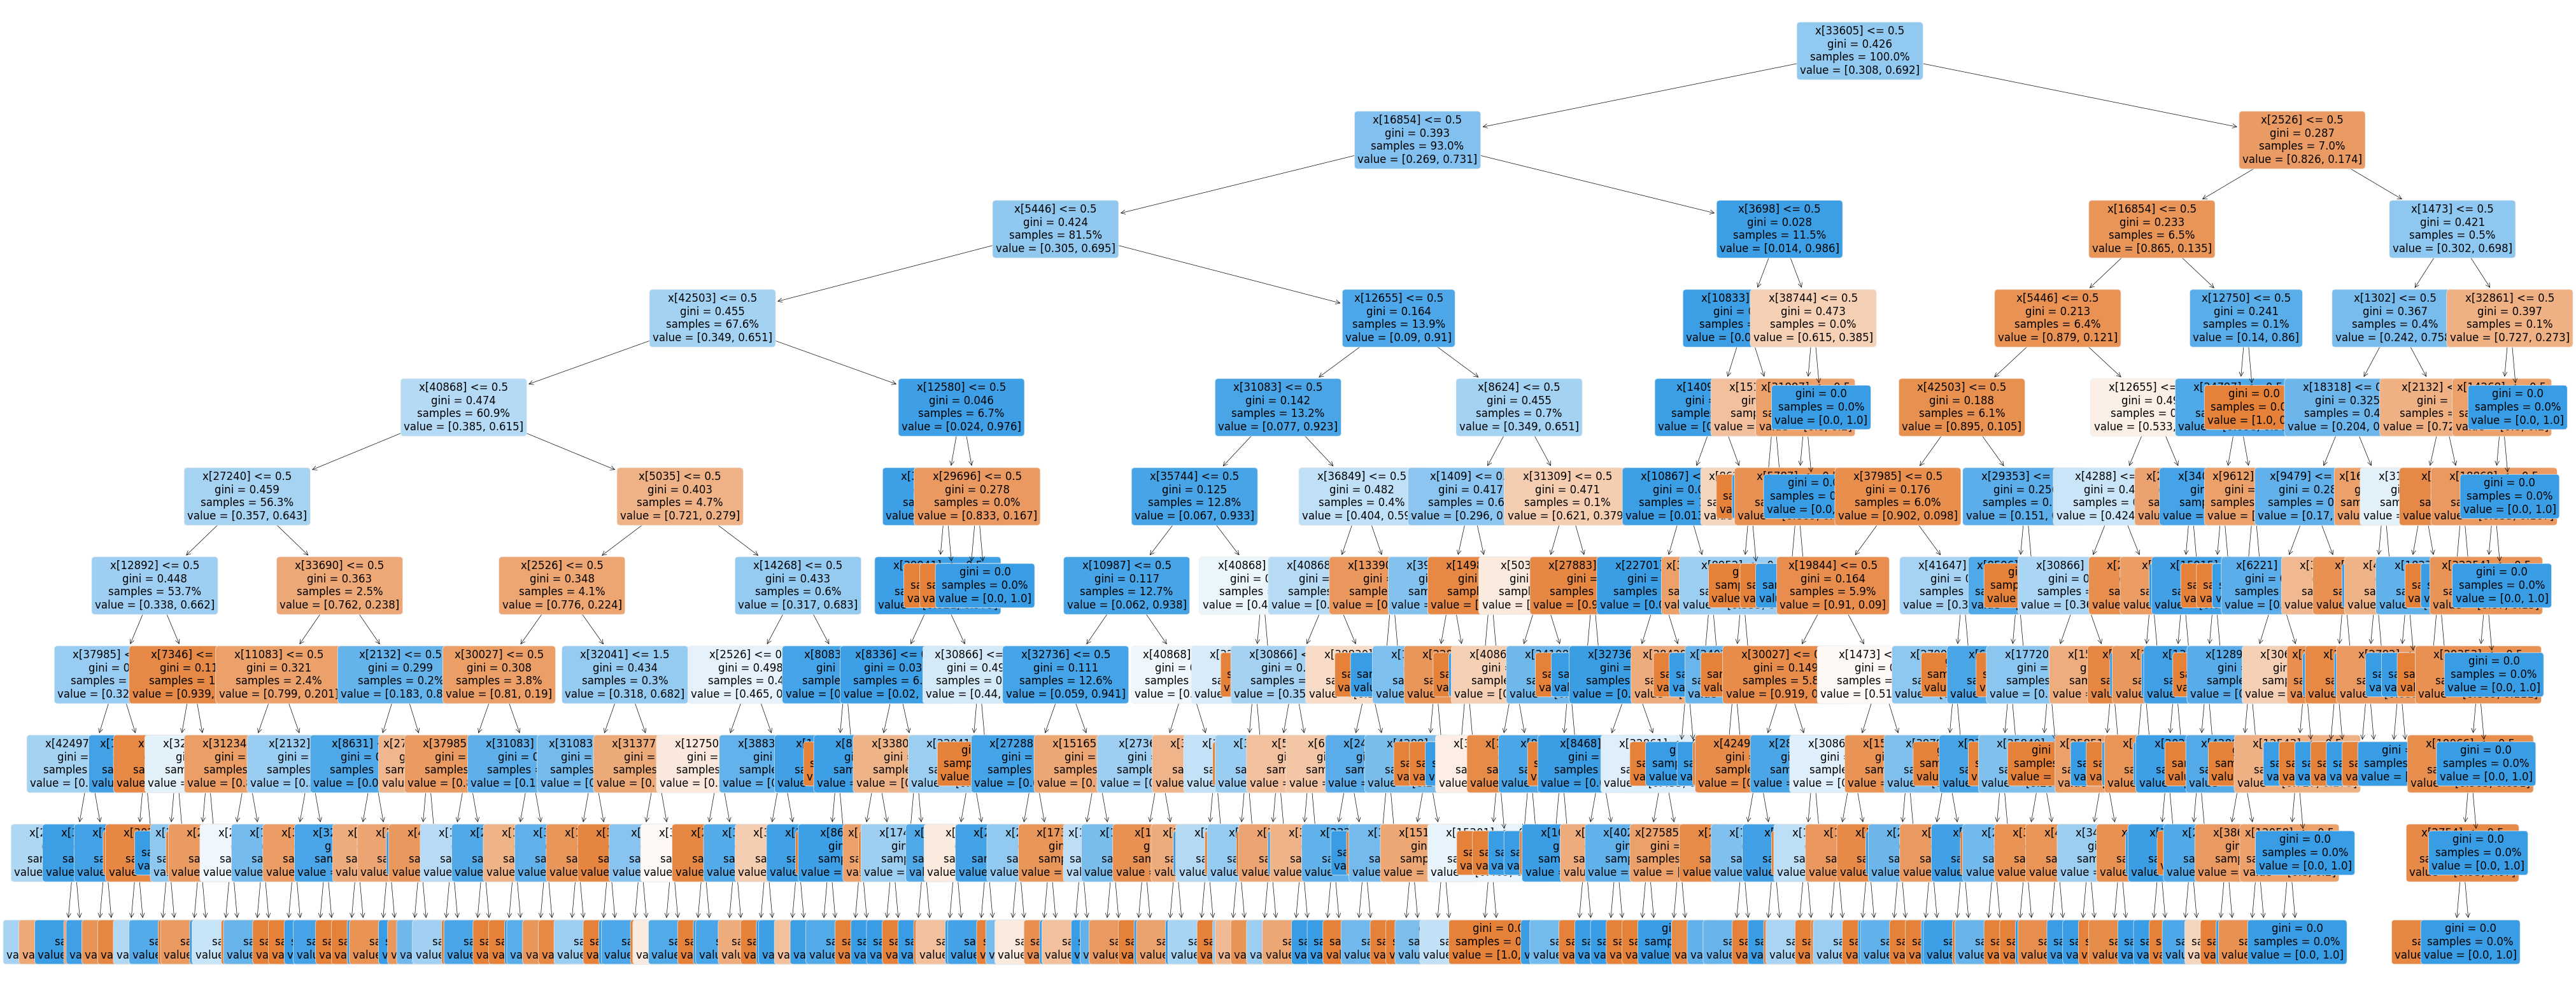

In [34]:
#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True, 
    proportion = True,
    fontsize=12, 
    rounded = True)
plt.show()

A DecisionTree no sklearn tem uma função chamada cost_complexity_pruning_path, que fornece os alfas efetivos das subárvores durante a poda e também as impurezas correspondentes. Em outras palavras, podemos usar esses valores de alfa para podar nossa árvore de decisão:

170
[0.26220662 0.26222453 0.26224248 0.2622608  0.262281   0.26230119
 0.26232139 0.26234158 0.26238415 0.26240569 0.26242723 0.26244877
 0.26249358 0.26251602 0.26253846 0.2625609  0.26258342 0.2626739
 0.26269698 0.26274314 0.26278981 0.26281337 0.26283693 0.26286086
 0.2628851  0.26290978 0.26295992 0.26298505 0.26301028 0.26303562
 0.26313699 0.26318793 0.26321344 0.26323902 0.26326543 0.26329235
 0.26337313 0.26340118 0.2634299  0.26345899 0.26348891 0.2635488
 0.26357935 0.26361012 0.26367354 0.26373744 0.26376959 0.2638021
 0.26383672 0.2639069  0.26394225 0.26397844 0.26405427 0.26409273
 0.26417378 0.26421517 0.26425727 0.26434378 0.26438745 0.26443118
 0.26451936 0.26456441 0.26461012 0.26465752 0.26470522 0.26475395
 0.26485171 0.26490125 0.26500048 0.26505035 0.26510046 0.26515137
 0.26541438 0.26546817 0.26552203 0.26557603 0.2656846  0.26579583
 0.26585241 0.26590952 0.26596679 0.26602429 0.26608231 0.26614045
 0.26620085 0.2662655  0.26633403 0.26640377 0.26647391 0.266

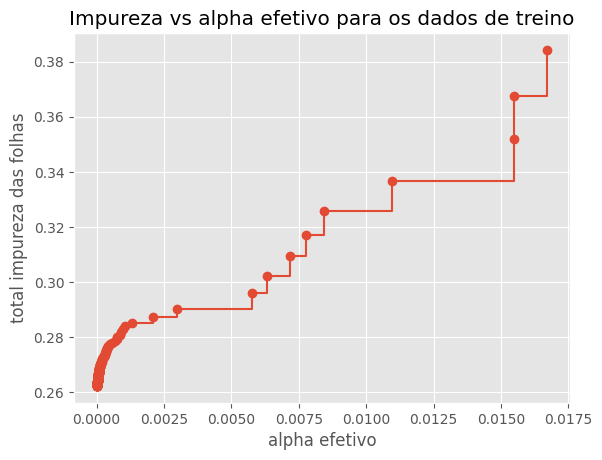

In [35]:
#Divide os dados em treino e validação 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(len(ccp_alphas))
print(impurities)

In [36]:
clfs = []
for ccp_alpha in tqdm(ccp_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

100%|██████████| 170/170 [1:13:47<00:00, 26.04s/it]


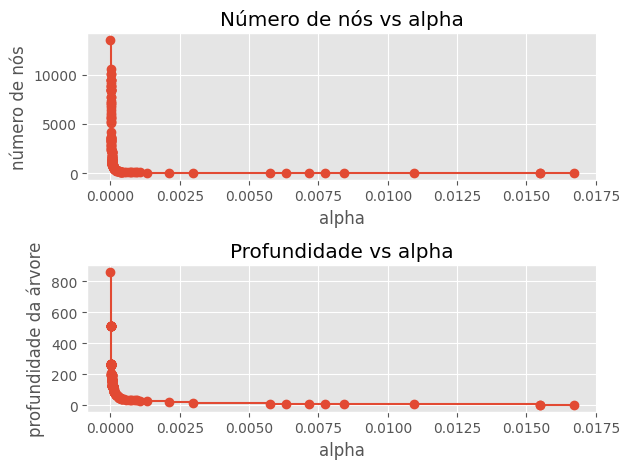

In [37]:
#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

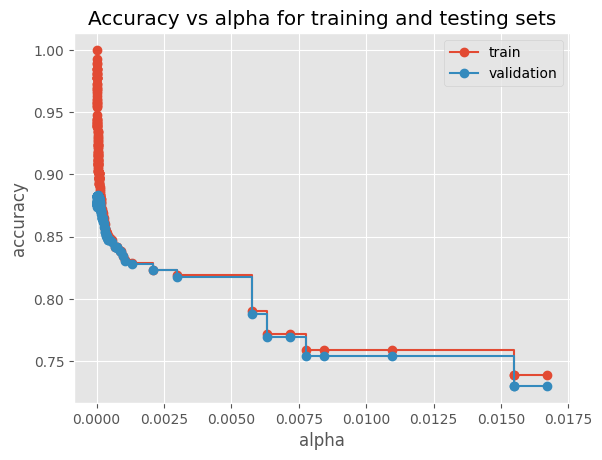

Melhor alpha:  3.534979031774769e-05


In [38]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

best_acc = 0
for v, i in zip(val_scores, range(len(val_scores))):
  if best_acc < v:
    best_acc = v
    best_alpha = clfs[i].ccp_alpha

print("Melhor alpha: ",best_alpha)

CPU times: user 26 s, sys: 23.9 ms, total: 26 s
Wall time: 26.1 s
Ein: 0.0659
Eout: 0.1074
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7162
           1       0.92      0.93      0.92     16050

    accuracy                           0.89     23212
   macro avg       0.88      0.87      0.87     23212
weighted avg       0.89      0.89      0.89     23212



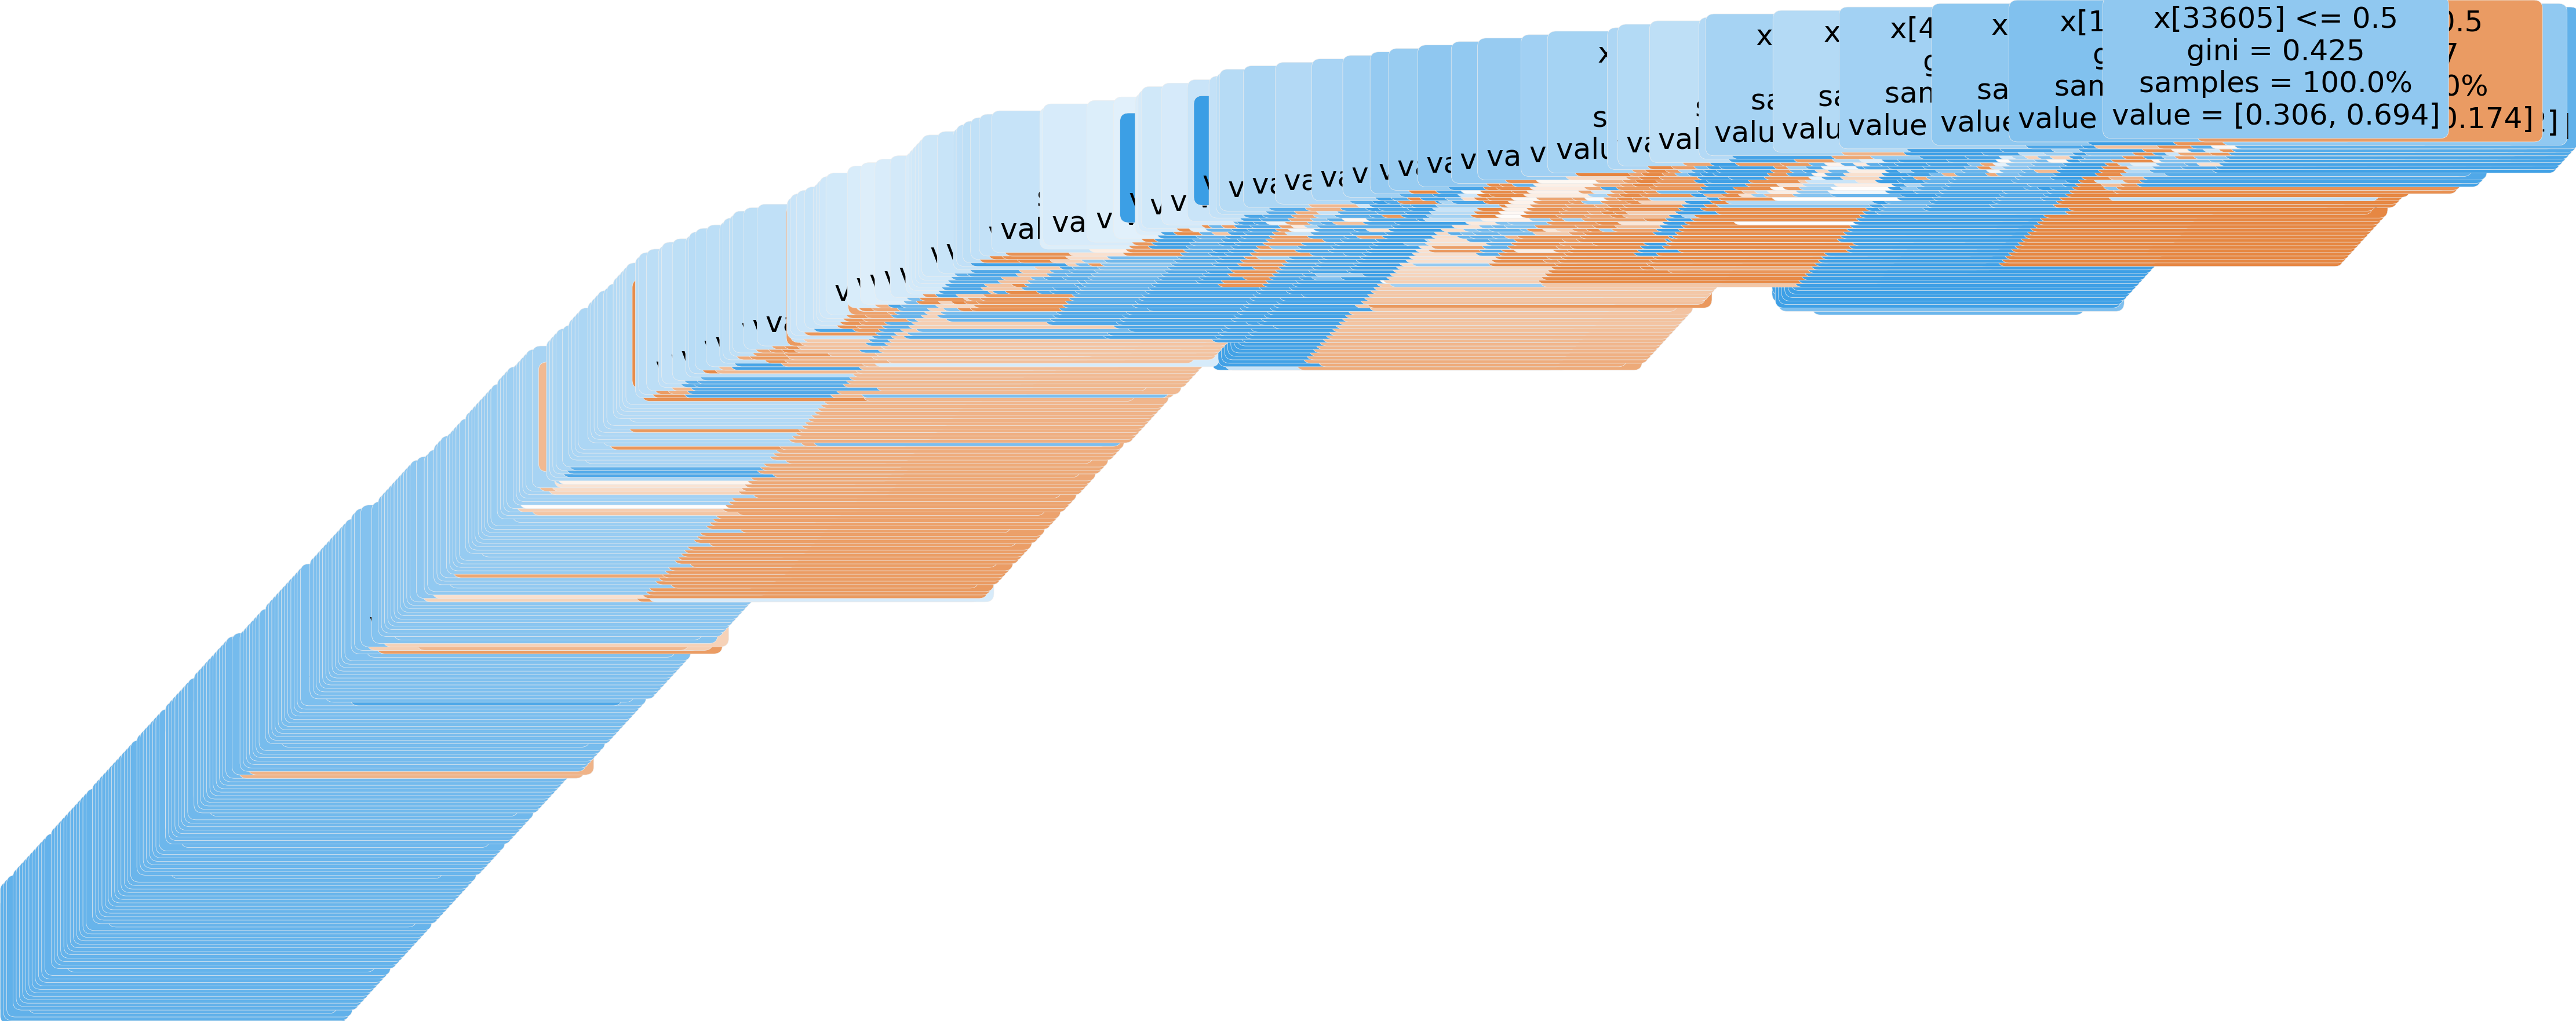

In [39]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
%time clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True, 
    proportion = True,
    fontsize=36, 
    rounded = True)
plt.show()

In [40]:
sentence = ["não recebi o produto, amei"]
sentence = vectorizer.transform(sentence)
if clf.predict(sentence) > 0.5 :
  print("Análise positiva")
else:
  print("Análise negativa")
clf.predict(sentence)

Análise positiva


array([1])

#SVM

gamma: Coeficiente de Kernel para ‘rbf’, ‘poly’ e ‘sigmoid’. Quanto maior o valor de gama, tentará o ajuste exato conforme o conjunto de dados de treinamento, ou seja, erro de generalização e causará problemas de ajuste excessivo.

C: Parâmetro de penalidade C do termo de erro. Ele também controla o trade-off entre os limites de decisão suave e a classificação correta dos pontos de treinamento.

Devemos sempre olhar para a pontuação de validação cruzada para ter uma combinação eficaz desses parâmetros e evitar o ajuste excessivo.

In [ ]:
#O SVM é uma ferramente muito poderosa, não precisamos de muitos dados para obter um resultado efetivo, então limitamos em 15 mil exemplos
X = X[:15000]
y = y[:15000]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
#regularização com cross validation
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

grid.best_params_

grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=  30.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=  29.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=  29.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=  29.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=  29.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=  12.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=  12.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=  12.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=  13.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=  12.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.807 total time=  11.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, grid.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, grid.predict(X_test))))

print(classification_report(y_test, grid.predict(X_test)))

Ein: 0.0142
Eout: 0.0763
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       929
           1       0.94      0.95      0.94      2071

    accuracy                           0.92      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000



In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

A validação cruzada mede o desempenho do modelo com os parâmetros especificados em um espaço de dados maior. Ou seja, ela usa todo o conjunto de dados de treinamento para o treinamento e a avaliação, em vez de uma parte dele.

In [ ]:
kfold = KFold(n_splits=2, shuffle=True, random_state=0)#Dividindo o dataset em 2 partes

#Passando os melhores parâmetros encontrados no grid para o modelo
model = SVC(C=10, gamma=0.01, kernel='rbf') #Melhores parâmetros encontrados no grid
results = cross_val_score(model, X_train, y_train, cv=kfold) #Validação cruzada
print(results.mean()) #Média dos resultados

0.9139999999999999


In [ ]:
sentence = ["amei o produto, vou comprar mais"]
sentence = vectorizer.transform(sentence)
if grid.predict(sentence) > 0.5 :
  print("Análise positiva")
else:
  print("Análise negativa")
grid.predict(sentence)

Análise positiva


array([1])